In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from models.cem_ibm_model import AEADEN 

In [2]:
dataset = MNIST(batch_size=64)
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN(device='cpu')

train_cnn(cnn, dataset, iterations=50, lr=0.01, device='cpu', save_fn='mnist-cnn-rescaled', load_path="models/saved_models/mnist-cnn.h5")

In [4]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


D:\Programmeren\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE()

train_ae(cae, dataset, iterations=2, save_fn="mnist-cae", load_path="./models/saved_models/mnist-cae-no-rs.h5")

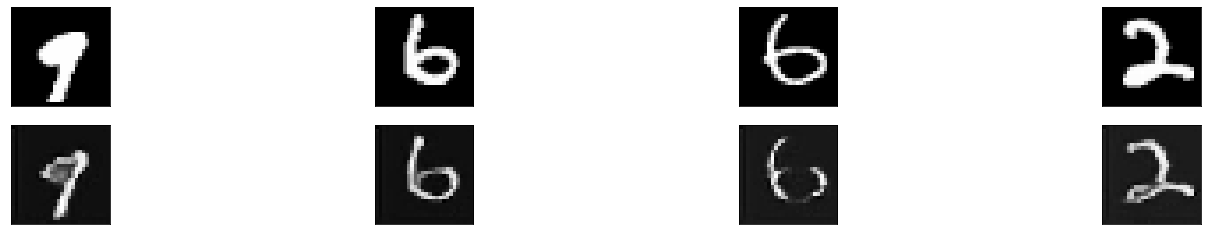

In [6]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [7]:
CEM = AEADEN(model=cnn, AE=cae, max_iterations=200, n_searches=10, mode="PP", c_init=0.1, kappa=10, gamma=100)

tensor(2)


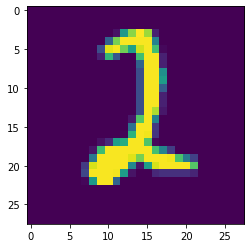

In [8]:
# obtain one sample
image, label = dataset.get_sample()

plt.imshow(image.squeeze())
print(label)

In [ ]:
# find pertinent negatives
CEM.compute_CEM(image)

--Return--
None
> d:\programmeren\uva-fact-ai\models\cem_ibm_model.py(152)FISTA()
    151         self.y_k.data.copy_(self.y_k_new) #UPDATE Y_K WITH K+1
--> 152         ipdb.set_trace()
    153 

ipdb> print(self.delta_k)
tensor([[[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000

ipdb> continue
--Return--
None
> d:\programmeren\uva-fact-ai\models\cem_ibm_model.py(152)FISTA()
    151         self.y_k.data.copy_(self.y_k_new) #UPDATE Y_K WITH K+1
--> 152         ipdb.set_trace()
    153 

ipdb> print(self.delta_k)
tensor([[[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -

ipdb> plt.imshow(self.delta_k)
*** NameError: name 'plt' is not defined
ipdb> import plt
*** ModuleNotFoundError: No module named 'plt'
ipdb> import matplotlib.pyplot as plt
ipdb> plt.imshow(self.delta_k)
*** TypeError: Invalid shape (1, 1, 28, 28) for image data
ipdb> plt.imshow(self.delta_k.squeeze())


In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin'

# from torchviz import make_dot
# make_dot(CEM.loss).view()

In [ ]:
print(CEM.best_delta)
print(CEM.best_delta - image)

In [ ]:
plt.imshow(CEM.best_delta.squeeze())

In [ ]:
plt.imshow(CEM.best_delta.view(28,28) - image.squeeze())

In [ ]:
# classification after
np.argmax(cnn(CEM.best_delta.view(1,28,28)).detach())

In [ ]:
# classification before
np.argmax(cnn(image.squeeze(-1)).detach())

In [ ]:
print(CEM.best_loss)

In [ ]:
print(CEM.best_pert_loss)

In [ ]:
print(CEM.best_c)